An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data
Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF).

In [40]:
URL = "https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [42]:
import pandas as pd
import html5lib
try:
    table = pd.read_html(URL)
    GDP = table[3]
    GDP
except ValueError:
    print("No values")
except IndexError:
    print("No Indexing")
GDP.set_index("Country/Territory", inplace=True)
GDP.head()

UN region IMF[1][13]            World Bank[14]             \
                  UN region   Estimate       Year       Estimate       Year   
Country/Territory                                                             
(World,)                  —  105568776       2023      100562011       2022   
(United States,)   Americas   26854599       2023       25462700       2022   
(China,)               Asia   19373586  [n 1]2023       17963171  [n 3]2022   
(Japan,)               Asia    4409738       2023        4231141       2022   
(Germany,)           Europe    4308854       2023        4072192       2022   

                  United Nations[15]             
                            Estimate       Year  
Country/Territory                                
(World,)                    96698005       2021  
(United States,)            23315081       2021  
(China,)                    17734131  [n 1]2021  
(Japan,)                     4940878       2021  
(Germany,)                   4259935       2021

In [43]:
GDP_IMF = GDP.iloc[:, :3]
GDP_IMF.head()

UN region IMF[1][13]           
                  UN region   Estimate       Year
Country/Territory                                
(World,)                  —  105568776       2023
(United States,)   Americas   26854599       2023
(China,)               Asia   19373586  [n 1]2023
(Japan,)               Asia    4409738       2023
(Germany,)           Europe    4308854       2023

In [46]:
GDP_IMF.dtypes
#so they are all objects

UN region   UN region    object
IMF[1][13]  Estimate     object
            Year         object
dtype: object

Get and Post requests using Requests

In [49]:
import requests 
URL = "https://www.ibm.com/us-en"
r = requests.get(URL)
r.status_code #family of 2XX means that the website is responding well to our requests

200

In [51]:
r.request.body
#print(r.rq.header)

In [61]:
r.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [63]:
r.text[1:100]

'<!DOCTYPE HTML>\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n  '

Webscraping and parsing htmls using Requests and BeautifulSoup

In [66]:
url = 'https://en.wikipedia.org/wiki/IBM'
import requests
from bs4 import BeautifulSoup

response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')
str(soup)[:200] #getting only snippet or truncated version of the request

'<!DOCTYPE html>\n\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pi'

In [68]:
#Finding all <a> tags in the html and printing their texts
links = soup.find_all('a')
for link in links:
    pass #Because we do not want the below code to run yet
    #print(link.text[:200]) 

## Wrangling with APIs
Example 1: Random Users API

In [71]:
from randomuser import RandomUser
r = RandomUser()
profile_list =r.generate_users(12)
profile_list

In [72]:
for people in profile_list:
    print(people.get_username(), "", people.get_email())

organicgoose602  latife.ayverdi@example.com
sadkoala610  vilmar.darosa@example.com
bigrabbit754  roberto.clark@example.com
heavysnake893  sina.roy@example.com
silverzebra898  lucy.thompson@example.com
whiterabbit221  buse.orge@example.com
lazyrabbit621  rdyn.nkwnzr@example.com
goldenmeercat919  emily.horton@example.com
orangeswan244  gerry.bishop@example.com
heavyzebra802  alessandro.duval@example.com
ticklishpeacock575  norman.murray@example.com
purpleswan807  mathea.dehli@example.com


In [73]:
for people in profile_list:
    print(people.get_picture())

https://randomuser.me/api/portraits/women/48.jpg
https://randomuser.me/api/portraits/men/38.jpg
https://randomuser.me/api/portraits/men/8.jpg
https://randomuser.me/api/portraits/women/79.jpg
https://randomuser.me/api/portraits/women/36.jpg
https://randomuser.me/api/portraits/women/51.jpg
https://randomuser.me/api/portraits/men/47.jpg
https://randomuser.me/api/portraits/women/93.jpg
https://randomuser.me/api/portraits/men/95.jpg
https://randomuser.me/api/portraits/men/75.jpg
https://randomuser.me/api/portraits/men/44.jpg
https://randomuser.me/api/portraits/women/46.jpg


In [74]:
Users = []
for people in profile_list:
    Users.append({'Name': people.get_username(), "Email": people.get_email(), 'City': people.get_city(), 'Photo': people.get_picture()})
pd.DataFrame(Users) 
#Webscraping was not observed with this illustrated API however

,Name,Email,City,Photo
0,organicgoose602,latife.ayverdi@example.com,Tekirdağ,https://randomuser.me/api/portraits/women/48.jpg
1,sadkoala610,vilmar.darosa@example.com,Jaraguá do Sul,https://randomuser.me/api/portraits/men/38.jpg
2,bigrabbit754,roberto.clark@example.com,Ballarat,https://randomuser.me/api/portraits/men/8.jpg
3,heavysnake893,sina.roy@example.com,Döttingen,https://randomuser.me/api/portraits/women/79.jpg
4,silverzebra898,lucy.thompson@example.com,Sunderland,https://randomuser.me/api/portraits/women/36.jpg
5,whiterabbit221,buse.orge@example.com,Çorum,https://randomuser.me/api/portraits/women/51.jpg
6,lazyrabbit621,rdyn.nkwnzr@example.com,یزد,https://randomuser.me/api/portraits/men/47.jpg
7,goldenmeercat919,emily.horton@example.com,Southampton,https://randomuser.me/api/portraits/women/93.jpg
8,orangeswan244,gerry.bishop@example.com,Letterkenny,https://randomuser.me/api/portraits/men/95.jpg
9,heavyzebra802,alessandro.duval@example.com,Thusis,https://randomuser.me/api/portraits/men/75.jpg


Example 2:FruityVice API

In [76]:
import json
data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")
result = json.loads(data.text) #loads results in the form of lists
pd.DataFrame(result).head()
#the nutrition column in nested and needs to be seperated

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."


In [77]:
Fruits = pd.json_normalize(result) #The pd.json is a unique function that can handle nested structures and create the entire
                                    #list/dictionary type into a dataframe
Fruits.head()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.0,18.0,18.0,0.0
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.4,5.4,5.5,0.8
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.2,2.6,3.9,0.9
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.1,10.0,15.0,0.4


In [78]:
Fruits = Fruits.set_index("name")
Fruits.head()

,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
name,,,,,,,,,
Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.0,18.0,18.0,0.0
Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.4,5.4,5.5,0.8
Banana,1,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0
Tomato,5,Solanaceae,Solanales,Solanum,74,0.2,2.6,3.9,0.9
Pear,4,Rosaceae,Rosales,Pyrus,57,0.1,10.0,15.0,0.4


In [79]:
Fruits.loc["Tomato"]["nutritions.calories"] #Finding out calories in Tomato

np.int64(74)

In [82]:
Fruits = Fruits.reset_index()
Fruits.head()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.0,18.0,18.0,0.0
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.4,5.4,5.5,0.8
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.2,2.6,3.9,0.9
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.1,10.0,15.0,0.4


In [83]:
#Alternative way to go by the search, but not very useful
Banana = Fruits.loc[Fruits["name"] == "Banana"]
Banana.iloc[0]["nutritions.calories"]

np.int64(96)

Using Pandas to scrape data from html

In [137]:
URL = "https://en.wikipedia.org/wiki/International_trade"
import pandas as pd
HTML = pd.read_html(URL)
Data = HTML[4]
Data.head()

,Rank,State,Goods (2022),Services (2021),Goods and services
0,–,World,50526,11533,62059
1,–,European Union,5858,2313,8171
2,1,China,6310,829,7138
3,2,United States,5441,1345,6786
4,3,Germany,3227,751,3978


In [80]:
Data_chief = Data[["State", "Goods and services"]]
Data_chief.head()

NameError: name 'Data' is not defined

In [118]:
#Another neater ways to parse html data from wikkipedia into DataFrame
import requests
from bs4 import BeautifulSoup
import pandas as pd

URL = "https://en.wikipedia.org/wiki/World_population"
File = requests.get(URL).text
Soup = BeautifulSoup(File, "html.parser")

In [88]:
len(tables)

27

In [84]:
tables = Soup.find_all('table')

In [100]:
#Now we check the actual wikkipedia webpage to find the heading name of the table that we are interested in to locate the index of the table
for index, table in enumerate(tables):
    if("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

6


In [116]:
#This does not really make too much sense
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        rank = col[0].text.strip()
        country = col[1].text.strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()

        # Create a temporary DataFrame for the new row
        new_row = pd.DataFrame([{"Rank": rank, "Country": country, "Population": population, "Area": area, "Density": density}])

        # Use concat 
        population_data = pd.concat([population_data, new_row], ignore_index=True)

population_data.head()

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,Palestine[note 3][99],"5,223,000","6,025",867
3,4,Taiwan[note 4],"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520


Working with HTML (Extras)

In [145]:
import requests
from bs4 import BeautifulSoup
import html5lib

In [151]:
HTML = "<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"
soup = BeautifulSoup(HTML, 'html5lib')
soup

<!DOCTYPE html>
<html><head><title>Page Title</title></head><body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>

In [157]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



In [159]:
soup.title

<title>Page Title</title>

In [175]:
tag_object = soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [177]:
tag_child = tag_object.b
tag_child

<b id="boldest">Lebron James</b>

In [181]:
tag_parent = tag_child.parent
tag_parent

<h3><b id="boldest">Lebron James</b></h3>

In [185]:
tag_highest = tag_parent.parent
tag_highest

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

In [189]:
tag_sibling = tag_object.next_sibling
tag_sibling

<p> Salary: $ 92,000,000 </p>

In [191]:
#Checking texts in a tag
tag_sibling.string

' Salary: $ 92,000,000 '

Working with table type html

In [206]:
html = "<table><tr><td id='flight'>Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"
Table = BeautifulSoup(html, "html5lib")
Table #It appears we do not need get requests to retrieve htmls

<html><head></head><body><table><tbody><tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr><tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr></tbody></table></body></html>

In [210]:
print(Table.prettify())

<html>
 <head>
 </head>
 <body>
  <table>
   <tbody>
    <tr>
     <td id="flight">
      Flight No
     </td>
     <td>
      Launch site
     </td>
     <td>
      Payload mass
     </td>
    </tr>
    <tr>
     <td>
      1
     </td>
     <td>
      <a href="https://en.wikipedia.org/wiki/Florida">
       Florida
      </a>
     </td>
     <td>
      300 kg
     </td>
    </tr>
    <tr>
     <td>
      2
     </td>
     <td>
      <a href="https://en.wikipedia.org/wiki/Texas">
       Texas
      </a>
     </td>
     <td>
      94 kg
     </td>
    </tr>
    <tr>
     <td>
      3
     </td>
     <td>
      <a href="https://en.wikipedia.org/wiki/Florida">
       Florida
      </a>
      <a>
      </a>
     </td>
     <td>
      80 kg
     </td>
    </tr>
   </tbody>
  </table>
 </body>
</html>



In [214]:
Table_rows = Table.find_all("tr")
Table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>,
 <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>]

In [218]:
first_row = Table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>

In [222]:
first_row.td

<td id="flight">Flight No</td>

In [224]:
for i, rows in enumerate(Table_rows):
    print(i, "is", rows)

0 is <tr><td id="flight">Flight No</td><td>Launch site</td><td>Payload mass</td></tr>
1 is <tr><td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a></td><td>300 kg</td></tr>
2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida</a><a> </a></td><td>80 kg</td></tr>


In [232]:
Table.find_all(href = True) #FInding every details in the html that is anchored with a link

[<a href="https://en.wikipedia.org/wiki/Florida">Florida</a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida</a>]

In [234]:
Table.find_all(string="Texas")

['Texas']

In [258]:
url = "https://www.ibm.com" 
html_content = requests.get(url).text
Data = BeautifulSoup(url, "html5lib")
Data

C:\Users\prien\AppData\Local\Temp\ipykernel_13960\1042993597.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  Data = BeautifulSoup(url, "html5lib")


<html><head></head><body>https://www.ibm.com</body></html>

In [265]:
for links in Data.find_all('a', href=True):
    print(links.get(href))

In [278]:
import requests
from bs4 import BeautifulSoup
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"
HTML = requests.get(URL).text
Soup= BeautifulSoup(HTML, "html5lib")

In [291]:
for rows in Soup.find_all("tr"):
    cols = rows.find_all("td")
    color_name = cols[2].string
    color_code = cols[3].string
color_name

'dodgerblue'

### API and webscraping project

In [131]:
!pip install yfinance #installed directly through pip becouse didnt work through prompt

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.6-py312-none-any.whl.metadata (23 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 2.6 MB/s eta 0:00:01
     -------------------- ------------------- 1.6/3.0 MB 2.9 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 3.1 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


In [133]:
import yfinance as yf
apple = yf.Ticker("AAPL")

In [159]:
import yfinance as yf
msft = yf.Ticker("MSFT")
msft

yfinance.Ticker object <MSFT>

In [164]:
#msft.info

In [174]:
Microsoft_price = msft.history(period="max")
Microsoft_price.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-01 00:00:00-04:00,431.109985,436.989990,424.899994,425.399994,58938100,0.0,0.0
2025-05-02 00:00:00-04:00,431.739990,439.440002,429.989990,435.279999,30757400,0.0,0.0
2025-05-05 00:00:00-04:00,432.869995,439.500000,432.109985,436.170013,20136100,0.0,0.0
2025-05-06 00:00:00-04:00,432.200012,437.730011,431.170013,433.309998,15104200,0.0,0.0
2025-05-07 00:00:00-04:00,433.839996,438.119995,431.109985,433.350006,23295300,0.0,0.0


<Axes: xlabel='Date'>

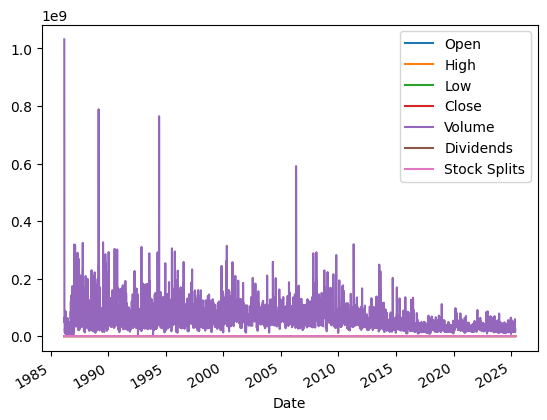

In [182]:
import matplotlib as plt
Microsoft_price.plot()

<Axes: xlabel='Date'>

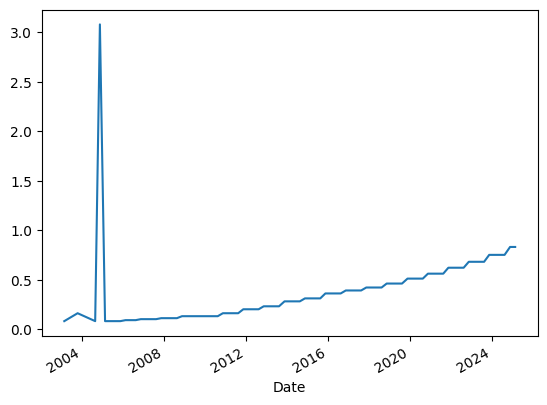

In [202]:
msft.dividends.plot()

Working on NETFLIX data

In [205]:
import requests
from bs4 import BeautifulSoup

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
File = requests.get(URL).text
Soup = BeautifulSoup(File, "html5lib")

In [225]:
Stock_detail = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
for rows in Soup.find("tbody").find_all("tr"):
    col = rows.find_all("td")
    Date = col[0].text.strip()
    Open = col[1].text.strip()
    High = col[2].text.strip()
    Low = col[3].text.strip()
    Close = col[4].text.strip()
    Volume = col[5].text.strip()
    Data = pd.DataFrame({"Date":[Date], 
                         "Open":[Open],
                         "High":[High],
                         "Low":[Low], 
                         "Close":[Close], 
                         "Volume":[Volume]})
    Stock_detail = pd.concat([Stock_detail, Data])
Stock_detail.head()

,Date,Open,High,Low,Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21
0,"May 01, 2021",512.65,518.95,478.54,502.81,502.81
0,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47
0,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66
0,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85


Tesla Versus GameStop

In [10]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
Tesla = yf.Ticker("TSLA")
#Tesla.info

In [12]:
Tesla_data = Tesla.history(period = "max")#it appears tha API is programmed to return dataframes
Tesla_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-02 00:00:00-04:00,284.899994,294.779999,279.809998,287.209991,114454700,0.0,0.0
2025-05-05 00:00:00-04:00,284.570007,284.850006,274.399994,280.260010,94618900,0.0,0.0
2025-05-06 00:00:00-04:00,273.109985,277.730011,271.350006,275.350006,76715800,0.0,0.0
2025-05-07 00:00:00-04:00,276.880005,277.920013,271.000000,276.220001,71592600,0.0,0.0
2025-05-08 00:00:00-04:00,279.630005,287.259399,279.410004,286.799988,43031358,0.0,0.0


In [16]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
File = requests.get(URL).text
Soup = BeautifulSoup(File, "html5lib")

Tesla_Revenue = pd.DataFrame(columns=["Date", "Revenue"])
for rows in Soup.find("tbody").find_all("tr"):
    cols = rows.find_all("td")
    Date = cols[0].text
    Revenue = cols[1].text.strip().replace("$", "").replace(",", "") #cleaning up the revenue column to keep integers only
    Data = pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})
    Tesla_Revenue = pd.concat([Tesla_Revenue, Data])
Tesla_Revenue.head()

,Date,Revenue
0,2021,53823
0,2020,31536
0,2019,24578
0,2018,21461
0,2017,11759


In [18]:
Tesla_Revenue.dtypes

Date       object
Revenue    object
dtype: object

In [40]:
#Lets make the Revenue column statistically processable
Tesla_Revenue["Revenue"] = Tesla_Revenue["Revenue"].astype(int).fillna(0) #lets fill the null values in zeroes too

In [42]:
Tesla_Revenue.dtypes

Date       object
Revenue     int64
dtype: object

In [38]:
Tesla_Revenue["Revenue"].mean()

np.float64(12327.692307692309)

In [46]:
import yfinance as yf
import pandas as pd
GME = yf.Ticker("GME")
#GME.info

In [62]:
GME_price = GME.history(period="max").tail()
GME_price.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

<Axes: xlabel='Date'>

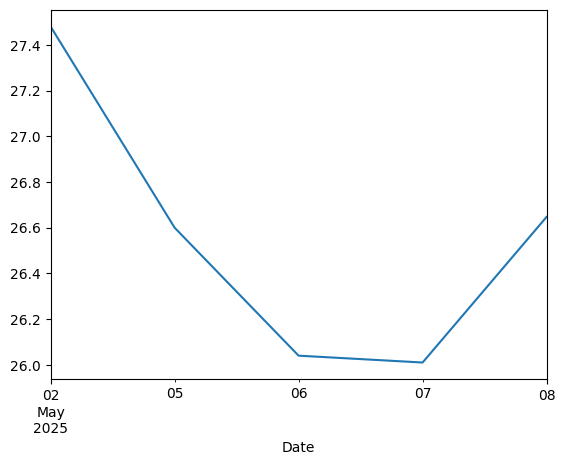

In [66]:
import matplotlib.pyplot as plt
GME_price["Close"].plot(x="Date", y="Price")

In [72]:
GME_price.Dividends.tail()

Date
2025-05-02 00:00:00-04:00    0.0
2025-05-05 00:00:00-04:00    0.0
2025-05-06 00:00:00-04:00    0.0
2025-05-07 00:00:00-04:00    0.0
2025-05-08 00:00:00-04:00    0.0
Name: Dividends, dtype: float64

In [76]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
import requests
from bs4 import BeautifulSoup
import pandas as pd
File = requests.get(URL).text
Soup = BeautifulSoup(File, "html5lib")
#Soup

In [92]:
GME_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for rows in Soup.find("tbody").find_all("tr"):
    col = rows.find_all("td") 
    Date = col[0].text.strip()
    Revenue  = col[1].text.strip().replace("$", "").replace(",","")
    temp_df = pd.DataFrame({"Date":[Date], 
                             "Revenue":[Revenue]})
    GME_revenue = pd.concat([GME_revenue, temp_df])
GME_revenue.head()

,Date,Revenue
0,2020,6466
0,2019,8285
0,2018,8547
0,2017,7965
0,2016,9364


In [94]:
GME_revenue.dtypes

Date       object
Revenue    object
dtype: object

In [100]:
GME_revenue["Revenue"] = GME_revenue["Revenue"].astype(int).fillna(0)
GME_revenue.dtypes

Date       object
Revenue     int64
dtype: object

Lets scrape a table from a wikkipedia

In [333]:
URL = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita"
PCI = pd.read_html(URL)
table = PCI[1] #I found the correct index out of trial-and-error
table.head()

Country/Territory IMF[4][5]       World Bank[6]       United Nations[7]  \
  Country/Territory  Estimate  Year      Estimate  Year          Estimate   
0            Monaco         —     —        256581  2023            256581   
1     Liechtenstein         —     —        186400  2022            201150   
2        Luxembourg    140941  2025        128678  2023            128936   
3           Bermuda         —     —        125842  2023            125842   
4           Ireland    108920  2025        103888  2023            106106   

         
   Year  
0  2023  
1  2023  
2  2023  
3  2023  
4  2023

In [334]:
Table1 = table.iloc[:, 0:3]
Table1.head()

Country/Territory IMF[4][5]      
  Country/Territory  Estimate  Year
0            Monaco         —     —
1     Liechtenstein         —     —
2        Luxembourg    140941  2025
3           Bermuda         —     —
4           Ireland    108920  2025

In [335]:
Table1.columns = ["Country", "Estimate", "Year"]
Table1 = Table1.set_index("Country")
Table1.head()

,Estimate,Year
Country,,
Monaco,—,—
Liechtenstein,—,—
Luxembourg,140941,2025
Bermuda,—,—
Ireland,108920,2025


In [336]:
Table1.dtypes

Estimate    object
Year        object
dtype: object

In [350]:
import numpy as np
Table1 = Table1.replace("—", np.nan).dropna() #replacing all "--" values with Not a Number value before dropping all not available values
Table1.head()

,Estimate,Year
Country,,
Luxembourg,140941,2025
Ireland,108920,2025
Switzerland,104896,2025
Singapore,92932,2025
Iceland,90284,2025


In [354]:
Table1["Estimate"] = Table1["Estimate"].astype(int) #converting the estimate value into integers for statistical purpose
Table1.dtypes

Estimate     int64
Year        object
dtype: object

In [365]:
Table1.describe() #calculating descriptive statistics. The distribution looks skewed visually. Needs to check through histogram

,Estimate
count,196.000000
mean,18848.882653
std,24303.371385
min,251.000000
25%,2839.250000
50%,7826.500000
75%,26127.000000
max,140941.000000


(array([124.,  25.,  19.,  11.,   7.,   3.,   4.,   2.,   0.,   1.]),
 array([   251.,  14320.,  28389.,  42458.,  56527.,  70596.,  84665.,
         98734., 112803., 126872., 140941.]),
 <BarContainer object of 10 artists>)

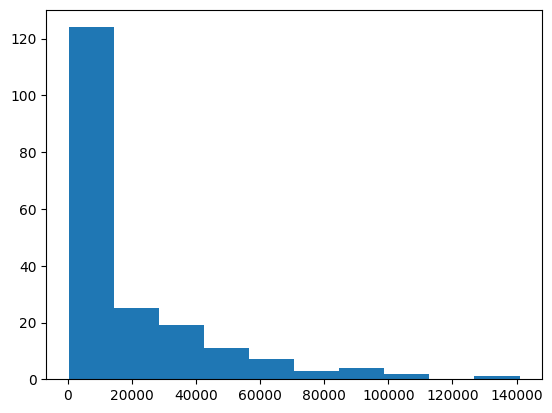

In [390]:
plt.hist(Table1["Estimate"]) #So, the data is quite skeweed to the left

In [393]:
Table1.info() #info() is a great way to check presence of null values and get a summary of dtypes in the serieses

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, Luxembourg to South Sudan
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Estimate  196 non-null    int64 
 1   Year      196 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.7+ KB
